In [289]:
import pandas as pd
import pyarrow.parquet as pq
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sbs

In [290]:
target = pd.read_json("niro3.json", orient='records', lines=True)
source = pd.read_json("niroSource.txt", orient='records', lines=True)

target.columns = ['EventCode', 'Date', 'Country', 'Events', 'Articles']
source.columns = ['EventCode', 'Date', 'Country', 'Events', 'Articles']

In [291]:
source.head()

,EventCode,Date,Country,Events,Articles
0,19,200705,IRQ,4100,23400
1,19,200305,SYR,52,276
2,20,200705,PAK,4,23
3,19,200604,PAK,512,1226
4,18,200605,AFG,174,472


In [292]:
target.head()

,EventCode,Date,Country,Events,Articles
0,20,200406,SYR,10,32
1,18,201105,MEX,108,466
2,19,200705,IRQ,3360,17815
3,20,200705,PAK,1,9
4,19,200305,SYR,26,104


In [293]:
def df_country(_df, country):
    return _df[_df.Country == country].drop('Country', axis=1).set_index(['Date'])

In [294]:
df = pd.concat([target, source])

df_grouped = df.groupby(['Date', 'Country']).sum().drop(['EventCode'], axis=1).sort_index(level=[0,1])

df = df_grouped.reset_index()

df['Ratio'] = df['Articles'] / df['Events'].astype('float')

df.drop(['Events', 'Articles'], axis=1, inplace=True)

irq = df_country(df, 'IRQ')
mex = df_country(df, 'MEX')
pak = df_country(df, 'PAK')
afg = df_country(df, 'AFG')
syr = df_country(df, 'SYR')

df.head()

,Date,Country,Ratio
0,200301,MEX,3.000000
1,200301,PAK,4.025822
2,200302,AFG,4.453642
3,200302,IRQ,4.048154
4,200302,MEX,5.035714


In [295]:
df_year = df.copy()

df_year['Date'] = df_year['Date'].apply(lambda d: int(d/100))

df_year = df_year.groupby(['Date', 'Country']).mean().reset_index()

irq_year1 = df_country(df_year, 'IRQ')
mex_year1 = df_country(df_year, 'MEX')
pak_year1 = df_country(df_year, 'PAK')
afg_year1 = df_country(df_year, 'AFG')
syr_year1 = df_country(df_year, 'SYR')

df_year.head()

,Date,Country,Ratio
0,2003,AFG,5.035443
1,2003,IRQ,5.031210
2,2003,MEX,3.991760
3,2003,PAK,4.342021
4,2003,SYR,4.420870


In [296]:
irq.head()

,Ratio
Date,
200302,4.048154
200303,5.565340
200304,5.630435
200309,4.880911
200402,4.962013


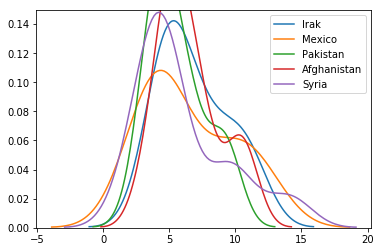

In [297]:
sbs.distplot(irq_year1, hist=False ,label='Irak')
sbs.distplot(mex_year1, hist=False,label='Mexico')
sbs.distplot(pak_year1, hist=False,label='Pakistan')
sbs.distplot(afg_year1, hist=False,label='Afghanistan')
sbs.distplot(syr_year1 , hist=False,label='Syria')


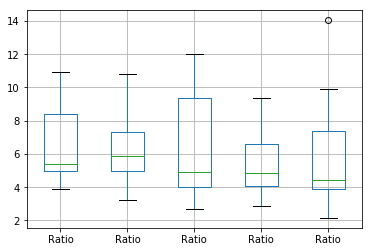

,Ratio,Ratio,Ratio,Ratio,Ratio
Date,,,,,
2003,5.031210,5.035443,3.991760,4.342021,4.420870
2004,4.896588,4.748898,4.010713,3.936342,4.125753
2005,4.923805,4.919242,3.776874,4.083817,3.529560
2006,3.905440,3.246893,2.697095,2.839903,2.150163
2007,5.400668,5.033961,4.192154,4.827676,3.683005
2008,5.159575,5.854719,4.920999,4.117818,5.272778
2009,9.344261,6.767181,5.873405,6.412760,4.262187
2010,7.496016,6.714280,11.295705,5.521167,5.395579
2011,7.424127,10.120923,9.036374,8.975778,9.387958


In [298]:
data  =[irq_year1,afg_year1,mex_year1,pak_year1,syr_year1]
data = pd.concat(data, axis=1)
data.boxplot()
plt.show()

data

In [299]:
def load_country(country_code):
    x = pd.read_csv('deaths_'+country_code+'.csv').drop(['country'], axis=1)
    x.columns = ['Date', 'Deaths']
    if(country_code == 'MEX'):
        x = x.append(pd.DataFrame([[2003, 0]], columns=['Date', 'Deaths']))
    return x.set_index('Date').sort_index()

def normalize(_df):
    return abs(_df - _df.mean()) / _df.std()

irq_year = load_country('IRQ').join(irq_year1)
mex_year = load_country('MEX').join(mex_year1)
pak_year = load_country('PAK').join(pak_year1)
afg_year = load_country('AFG').join(afg_year1)

irq_year_normalized = normalize(irq_year)
mex_year_normalized = normalize(mex_year)
pak_year_normalized = normalize(pak_year)
afg_year_normalized = normalize(afg_year)

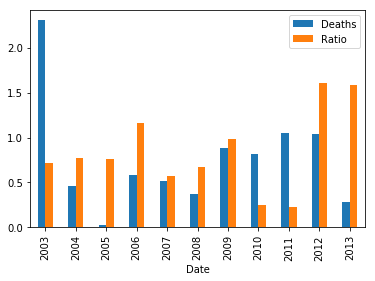

In [300]:
irq_year_normalized.plot(kind='bar')

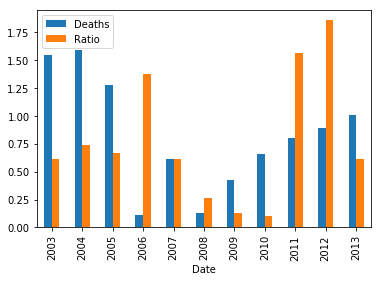

In [301]:
afg_year_normalized.plot(kind='bar')

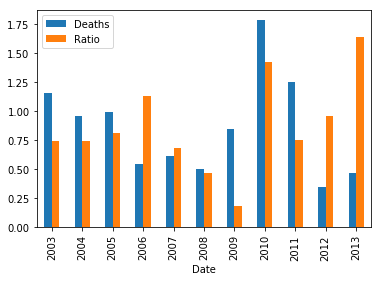

In [302]:
mex_year_normalized.plot(kind='bar')

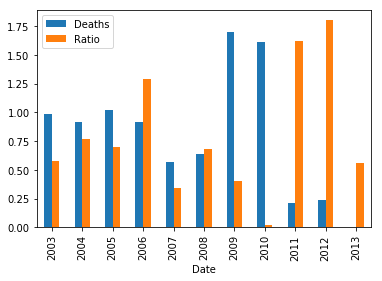

In [303]:
pak_year_normalized.plot(kind='bar')

In [313]:
data  =[irq_year_normalized,afg_year_normalized,mex_year_normalized,pak_year_normalized]
data = pd.concat(data, axis=1)

data.columns = [x + '_' + y for y in ['Deaths', 'Ratio'] for x in ['Iraq', 'Afghanistan', 'Mexico', 'Pakistan']]

data

,Iraq_Deaths,Afghanistan_Deaths,Mexico_Deaths,Pakistan_Deaths,Iraq_Ratio,Afghanistan_Ratio,Mexico_Ratio,Pakistan_Ratio
Date,,,,,,,,
2003,2.304319,0.718901,1.544870,0.613153,1.157201,0.747483,0.986209,0.577143
2004,0.458111,0.772074,1.589909,0.735874,0.961886,0.741845,0.915964,0.769264
2005,0.029328,0.761323,1.272862,0.662919,0.991184,0.811404,1.018916,0.699423
2006,0.582072,1.163553,0.112840,1.379150,0.548174,1.132601,0.917079,1.288515
2007,0.521108,0.572974,0.609914,0.613788,0.615646,0.687873,0.568081,0.347147
2008,0.371514,0.668200,0.127605,0.262274,0.502089,0.471066,0.641333,0.683321
2009,0.886664,0.984648,0.425147,0.128513,0.851880,0.187758,1.696876,0.403516
2010,0.819095,0.254636,0.656372,0.105857,1.784066,1.425190,1.609905,0.018724
2011,1.051268,0.226242,0.803192,1.564849,1.253164,0.753116,0.215400,1.617307
